In [1]:
# get rid of some chemprop warnings
# import warnings

# warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import os
import pandas as pd

from qsprpred.data import QSPRDataset, RandomSplit
from qsprpred.data.descriptors.fingerprints import MorganFP
from qsprpred.data.descriptors.sets import SmilesDesc

os.makedirs("/home/s2861704/ppk/test_kin/test_output/data", exist_ok=True)

df=pd.read_csv('/home/s2861704/ppk/test_kin/prep_storage/K200_EGFR_TEST.csv', sep=',')

# Create dataset
dataset = QSPRDataset(
    df=df,
    store_dir="/home/s2861704/ppk/test_kin/test_output/data",
    name="ChempropSTTestDataset",
    target_props=[{"name": "pchembl_value_Mean", "task": "REGRESSION"}],
    random_state=42
)

# calculate compound features and split dataset into train and test
feature_calculators = [SmilesDesc(), MorganFP(radius=3, nBits=2048)]
dataset.prepareDataset(
    split=RandomSplit(test_fraction=0.2, dataset=dataset),
    feature_calculators=feature_calculators,
    recalculate_features=True,
)

dataset.getDF().head()

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD,Classification,QSPRID,pchembl_value_Mean_original
QSPRID,,,,,,,,,,,,,,,,,,,,,
ChempropSTTestDataset_00000,AAAAZQPHATYWOK_on_P00533_WT,High,ChEMBL31;Sharma2016;Sharma2016,ChEMBL31.compound.33854;4277046;4277046,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4nc5ccccc5s4)c(Cl)...,AAAAZQPHATYWOK,AAAAZQPHATYWOK-UHFFFAOYSA-N,InChI=1S/C32H29ClN6O3S/c1-4-41-28-16-25-22(15-...,"""AuxInfo=1/1/N:1,17,18,2,34,33,14,35,32,13,38,...",P00533_WT,...,6.730; 6.726; 6.063,6.506,0.313,0.222,3.0,6.726,0.004,Enzyme->Kinase->Protein Kinase->TK protein kin...,ChempropSTTestDataset_00000,6.506
ChempropSTTestDataset_00001,AAEPFBULPJOZCS_on_P00533_WT,High,Sharma2016,10064954,C=CC(=O)Nc1cccc(-n2c(=O)cc(C)c3cnc(Nc4cn(C)nc4...,AAEPFBULPJOZCS,AAEPFBULPJOZCS-UHFFFAOYSA-N,InChI=1S/C22H18F3N7O2/c1-4-17(33)27-13-6-5-7-1...,"""AuxInfo=1/1/N:1,16,25,2,8,7,9,14,34,33,23,15,...",P00533_WT,...,7.276,7.276,0.000,0.000,1.0,7.276,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...,ChempropSTTestDataset_00001,7.276
ChempropSTTestDataset_00002,AAFHSECTTHOVFV_on_P00533_WT,High,Sharma2016,4486432,COc1cc(N2CCN(C)CC2)ccc1Nc1ncc2c(n1)N(c1cccc(N)...,AAFHSECTTHOVFV,AAFHSECTTHOVFV-UHFFFAOYSA-N,InChI=1S/C25H30N8O2/c1-30-9-11-32(12-10-30)19-...,"""AuxInfo=1/1/N:32,14,1,23,22,24,26,25,30,33,29...",P00533_WT,...,6.321; 5.311; 4.952,5.528,0.580,0.410,3.0,5.311,0.359,Enzyme->Kinase->Protein Kinase->TK protein kin...,ChempropSTTestDataset_00002,5.528
ChempropSTTestDataset_00003,AAGKMGNYUYCEPD_on_P00533_WT,High,ChEMBL31,ChEMBL31.compound.183555,CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc45)c(Cl...,AAGKMGNYUYCEPD,AAGKMGNYUYCEPD-UHFFFAOYSA-N,InChI=1S/C23H19ClN6O2S/c1-14(31)25-8-10-30-9-7...,"""AuxInfo=1/1/N:1,22,21,23,30,29,9,5,8,6,15,26,...",P00533_WT,...,8.540,8.540,0.000,0.000,1.0,8.540,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...,ChempropSTTestDataset_00003,8.540
ChempropSTTestDataset_00004,AAHKGRWRYBCWDL_on_P00533_WT,High,Sharma2016,4358384,CCOc1ccc(-c2nn(C3CCCC3)c3ncnc(N)c23)cc1OC,AAHKGRWRYBCWDL,AAHKGRWRYBCWDL-UHFFFAOYSA-N,InChI=1S/C19H23N5O2/c1-3-26-14-9-8-12(10-15(14...,"""AuxInfo=1/1/N:1,7,2,15,16,14,17,25,26,8,23,9,...",P00533_WT,...,5.854,5.854,0.000,0.000,1.0,5.854,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...,ChempropSTTestDataset_00004,5.854


In [3]:
from qsprpred.extra.gpu.models.chemprop import ChempropModel

ChempropModel.getAvailableParameters()

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


{'no_cuda': 'Turn off cuda (i.e., use CPU instead of GPU).',
 'gpu': 'Which GPU to use.',
 'num_workers': 'Number of workers for the parallel data loading (0 means sequential).',
 'batch_size': 'Batch size.',
 'no_cache_mol': 'Whether to not cache the RDKit molecule for each SMILES string to reduce memory usage (cached by default).',
 'empty_cache': 'Whether to empty all caches before training or predicting. This is necessary if multiple jobs are run within a single script and the atom or bond features change.',
 'loss_function': 'Choice of loss function. Loss functions are limited to compatible dataset types.',
 'metric': "Metric to use with the validation set for early stopping. Defaults to 'auc' for classification, 'rmse' for regression. Note. In Chemprop this metric is also used for test-set evaluation, but in QSPRpred this is determined by the scoring parameter in assessment.",
 'bias': 'Whether to add bias to linear layers.',
 'hidden_size': 'Dimensionality of hidden layers in MP

In [4]:
# Create model
os.makedirs("/home/s2861704/ppk/test_kin/test_output/models", exist_ok=True)
model = ChempropModel(
    base_dir='/home/s2861704/ppk/test_kin/test_output/models',
    name='ChempropSTTestModel',
    parameters={"epochs": 5},
    quiet_logger=False
)

In [5]:
from qsprpred.models import CrossValAssessor, TestSetAssessor
from qsprpred.models.early_stopping import EarlyStoppingMode

# We can now assess the model performance on the training set using cross validation
CrossValAssessor('r2')(model, dataset)

# and on the test set
TestSetAssessor('r2')(model, dataset)

# Finally, we need to fit the model on the complete dataset if we want to use it further
# This will save the fitted model and metadata to disk
model.earlyStopping.numEpochs = 5
model.fitDataset(dataset, mode=EarlyStoppingMode.FIXED)

# We can optionally save the model and metadata to disk explicitly as well
_ = model.save()

qsprpred - WARNING - Random state supplied, but alg <class 'qsprpred.extra.gpu.models.chemprop.ChempropMoleculeModel'> does not support it. Ignoring this setting.


train size = 9,216 | val size = 1,025
Total size = 10,241
Fitting scaler
Number of parameters = 355,201
Moving trained model to cuda
  0%|          | 0/5 [00:00<?, ?it/s]Epoch 0
Loss = 1.0790e+00, PNorm = 33.9635, GNorm = 0.8699, lr_0 = 1.2690e-04
Loss = 9.0384e-01, PNorm = 33.9643, GNorm = 2.1155, lr_0 = 1.5136e-04
Loss = 1.0591e+00, PNorm = 33.9660, GNorm = 1.9998, lr_0 = 1.7582e-04
Loss = 1.1143e+00, PNorm = 33.9692, GNorm = 2.2164, lr_0 = 2.0027e-04
Loss = 9.8399e-01, PNorm = 33.9737, GNorm = 4.3480, lr_0 = 2.2473e-04
Loss = 8.3815e-01, PNorm = 33.9800, GNorm = 1.4098, lr_0 = 2.4918e-04
Loss = 9.4419e-01, PNorm = 33.9871, GNorm = 4.0550, lr_0 = 2.7364e-04
Loss = 9.6295e-01, PNorm = 33.9966, GNorm = 4.7082, lr_0 = 2.9810e-04
Loss = 9.5773e-01, PNorm = 34.0088, GNorm = 1.0887, lr_0 = 3.2255e-04
Loss = 1.0459e+00, PNorm = 34.0228, GNorm = 4.9135, lr_0 = 3.4701e-04
Loss = 9.3069e-01, PNorm = 34.0377, GNorm = 1.2261, lr_0 = 3.7147e-04
Loss = 9.7384e-01, PNorm = 34.0588, GNorm = 1.5582, 

ChempropSTTestModel


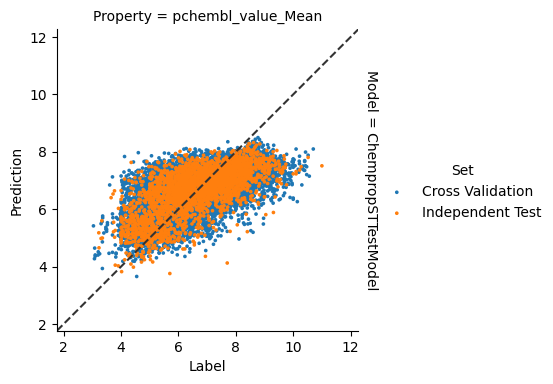

<Figure size 640x480 with 0 Axes>

In [6]:
from qsprpred.plotting.regression import CorrelationPlot

plot = CorrelationPlot([model])
axes, summary = plot.make(save=True, show=True, out_path='/home/s2861704/ppk/test_kin/test_output/ChempropST.png')

In [7]:
summary

,Model,Fold,Property,R2,RMSE,Set
0,ChempropSTTestModel,0.0,pchembl_value_Mean,0.383549,0.949499,Cross Validation
1,ChempropSTTestModel,1.0,pchembl_value_Mean,0.373092,0.952212,Cross Validation
2,ChempropSTTestModel,2.0,pchembl_value_Mean,0.349895,0.985723,Cross Validation
3,ChempropSTTestModel,3.0,pchembl_value_Mean,0.376609,0.946239,Cross Validation
4,ChempropSTTestModel,4.0,pchembl_value_Mean,0.378981,0.948675,Cross Validation
5,ChempropSTTestModel,Independent Test,pchembl_value_Mean,0.439877,0.921339,Independent Test
